# Implementing Motion with Constant Velocity and Acceleration
## 1D motion using matplotlib for visualization

In [1]:
# initialize velocity 
v0 = eval(input("enter initial velocity: "))

enter initial velocity: 1


In [2]:
# initialize acceleration 
a0 = eval(input("enter initial acceleration: "))

enter initial acceleration: 10


In [3]:
# initialize time, step, number of iterations
t = 0.0
dt = 0.1
n = 1000

# declare empty lists to hold time, and position
time = []
position = []
xa = []

The physics describing the motion with constant velocity is:
$$ x = v_0 t$$

The physics describing the motion with constant acceleration is:
$$ v = v_0 + a_0 t$$
$$ x = v_0 t + a_0 t^2/2 $$

In [4]:
# iterate over the number of steps using a loop
for i in range(n):
    time.append(t)
    position.append(v0*t)
    xa.append(v0*t + a0/2.0*t**2)
    t = t + dt

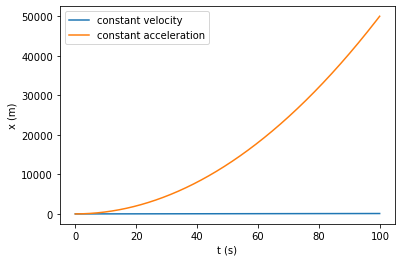

In [5]:
import matplotlib.pyplot as plt
plt.figure()                    # start a figure
plt.plot(time, position, label="constant velocity")
plt.plot(time, xa, label="constant acceleration")

plt.xlabel('t (s)')             # add labels
plt.ylabel('x (m)')
plt.legend(loc=2)    # legend in upper-left corner  (1 is upper-right, 3 is lower-left, 


# plt.show() 

## Animation using matplotlib
*https://scipython.com/book2/chapter-7-matplotlib/examples/animating-a-bouncing-ball/*

Let's now combine a motion with constant velocity in the horizontal ($x$) direction, and with constant acceleration in the vertical ($y$) direction, and animate the motion!
*The ball's position, trajectory history and height label all change with each frame.*
We will make the ball fall and bounce on the ground. 

In [6]:
# initialize velocity 
v0x = eval(input("enter initial velocity in the x direction: "))

enter initial velocity in the x direction: 1


In [7]:
v0y = eval(input("enter initial velocity in the y direction: "))

enter initial velocity in the y direction: 10


In [8]:
# Acceleration due to gravity, m.s-2.
g = 9.81
# The maximum range of ball's trajectory to plot.
xmax = 10
ymax = 10
# The time step for the animation.
dt = 0.1 
# Initial position and velocity vectors.
t0 = 0
x0, y0 = 0, ymax/2 # initial position on the ball.

# The coefficient of restitution for bounces (-v_up/v_down).
#cor = 0.65

We define a generator function, *get_pos* that instead of *return* will use *yield* which allows it to keep on producing the ball's position vector, $(x, y)$ until the ball's x-coordinate reaches xmax.
At this point the generator is exhausted and produces None, and the animation stops.

In [9]:
def get_pos():
# A generator yielding the ball's position at time t."""
    t, x, y, vx, vy = t0, x0, y0, v0x, v0y
    while x < xmax:
# motion with constant velocity on the x direction
        x = x + vx * dt
# motion with constant acceleration on the y direction
        y = y + vy * dt
        vy = vy - g * dt
#update time    
        t = t + dt 
# make the ball bounce
        if y < 0:
            y = 0
            vy = -vy
        elif y > ymax:
            y = 0
            vy = -vy
        yield x, y # produces a sequence of values

In [10]:
# first build the figure
import matplotlib.pyplot as plt
import matplotlib.animation as animation

We draw the figure, initialize the plot and ball. 

In [11]:
def init():
# Initialize the animation figure."""
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_xlabel('x/m')
    ax.set_ylabel('y/m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

Now we append the line with the updated position.

In [12]:
def animate(pos):
# For each frame, advance the animation to the new position, pos."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
# the lines below keep updating the plot with the new position    
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

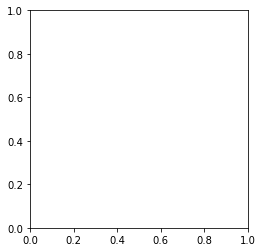

In [13]:
# Set up a new figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
ax.set_aspect('equal')

The frames are controlled by *FuncAnimation* which is given the generator function, *get_pos*, which returns the next position of the ball each time it iterates. This position is handed on to the animate function instead of the integer index of the frame.

In [14]:
# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.1, color='black')
height_text = ax.text(xmax*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = t # change to control the interval
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init)
#plt.show()

In [15]:
from IPython.display import HTML
HTML(ani.to_html5_video())